## 추세변동(trend variation)

In [7]:
import numpy as np
import pandas as pd

#Datetiemlindex
dates = pd.date_range('2020-01-01', periods=48, freq='M')

#additive model: trend + cycle + seasonality + irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0,3.14*2, 48))
seasonal_factor = 7*np.sin(np.linspace(0,3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))

df = pd.DataFrame({'timeseries': trend_factor + cycle_factor + seasonal_factor + irregular_factor,
                    'trend': trend_factor,
                    'cycle': cycle_factor,
                    'seasonal':seasonal_factor,
                    'irregular': irregular_factor},
                    index=dates)

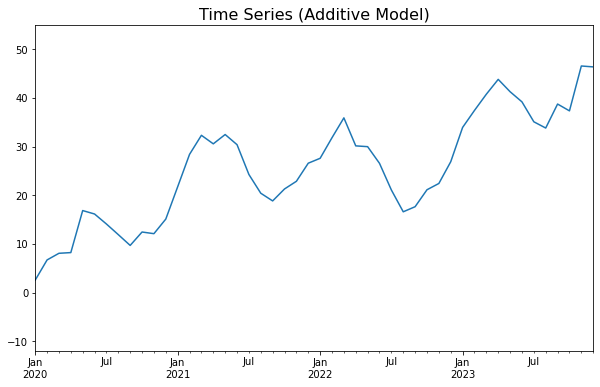

In [9]:
# Time series plot
import matplotlib.pyplot as plt

plt.figure(figsize =[10,6])
df.timeseries.plot()
plt.title('Time Series (Additive Model)', fontsize =16)
plt.ylim(-12, 55)
plt.show()

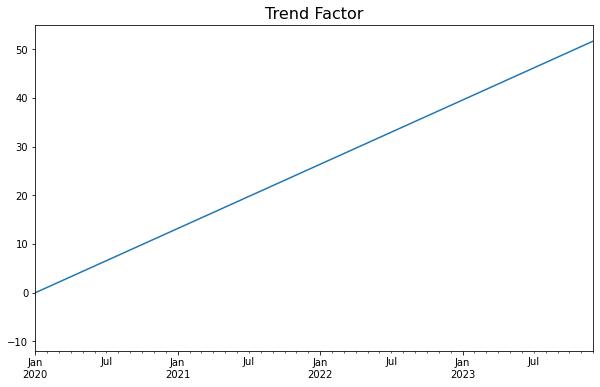

In [10]:
# -- Trend variation
# rimestamp = np.arange(len(dates))
# trend_factor = rimestamp*1.1

plt.figure(figsize=[10,6])
df.trend.plot()
plt.title('Trend Factor', fontsize=16)
plt.ylim(-12, 55)
plt.show()

## 순환변동(cyclical variation)

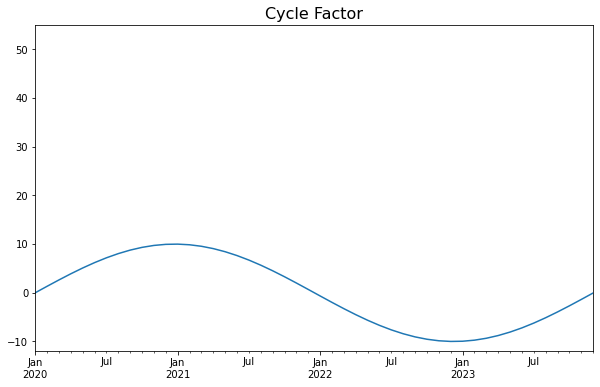

In [11]:
# 4년 주기
# -- Cycle variation
# cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))

plt.figure(figsize=[10,6])
df.cycle.plot()
plt.title('Cycle Factor', fontsize=16)
plt.ylim(-12, 55)
plt.show()

## 평활화 기법(Smoothing Methods)

##### SMA(단순이동평균)
- pandas.DataFrame.rolling
- DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')

In [12]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


In [13]:
pip install finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [17]:
import FinanceDataReader as fdr

df = fdr.DataReader('AAPL', '2017')
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092


In [19]:
pd.date_range(start='2020-08', periods=8, freq='W')

DatetimeIndex(['2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [20]:
df = pd.DataFrame({
    "week":pd.date_range(start='2020-08', periods=8, freq='W'),
    "sales":[39,44,40,45,38,43,39,np.nan],
    "3MA":[0]*8
})

df["3MA"] = df [["sales"]].rolling(3).mean().shift(1)
df

,week,sales,3MA
0,2020-08-02,39.0,NaN
1,2020-08-09,44.0,NaN
2,2020-08-16,40.0,NaN
3,2020-08-23,45.0,41.0
4,2020-08-30,38.0,43.0
5,2020-09-06,43.0,41.0
6,2020-09-13,39.0,42.0
7,2020-09-20,NaN,40.0


In [31]:
import FinanceDataReader as fdr

df = fdr.DataReader('AAPL', start='2010')
#df.head()
df['Close_7Days_Mean'] = df['Close'].rolling(7).mean()

df.tail(10)

,Close,Open,High,Low,Volume,Change,Close_7Days_Mean
Date,,,,,,,
2022-07-08,147.04,145.26,147.55,145.00,64300000.0,0.0047,141.821429
2022-07-11,144.87,145.67,146.64,143.78,63310000.0,-0.0148,142.627143
2022-07-12,145.86,145.76,148.45,145.05,77590000.0,0.0068,143.932857
2022-07-13,145.49,142.99,146.45,142.12,71190000.0,-0.0025,144.870000
2022-07-14,148.47,144.08,148.95,143.25,78140000.0,0.0205,145.857143
2022-07-15,150.17,149.78,150.86,148.20,76260000.0,0.0115,146.892857
2022-07-18,147.07,150.84,151.54,146.74,77540000.0,-0.0206,146.995714
2022-07-19,151.00,147.98,151.20,146.92,82150000.0,0.0267,147.561429
2022-07-20,153.04,151.17,153.69,150.39,64460000.0,0.0135,148.728571


Text(0.5, 1.0, 'Close Price for Apple')

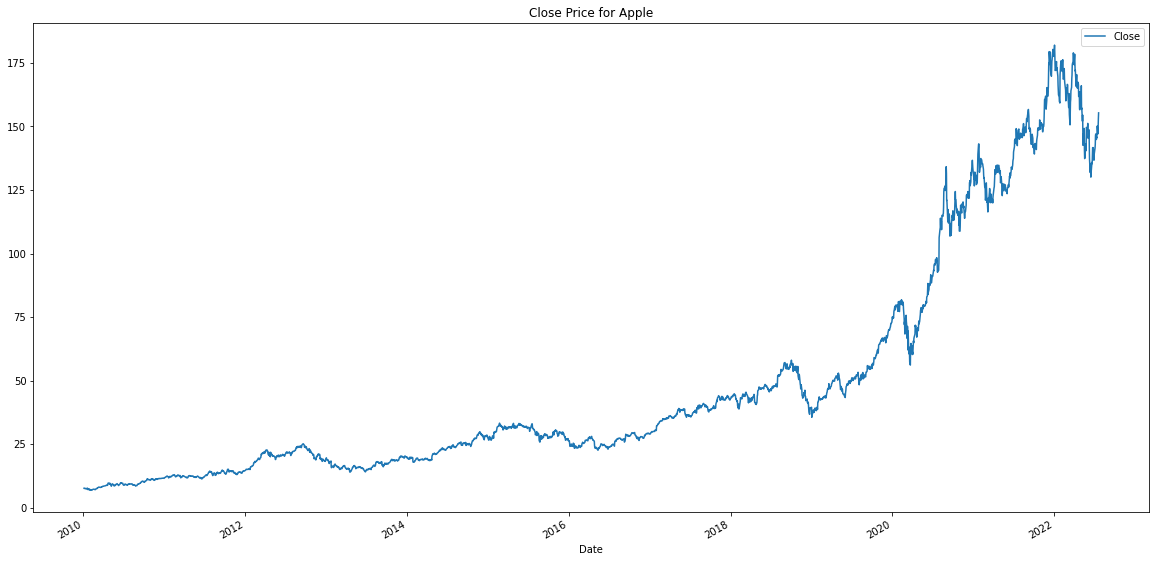

In [34]:
#df['Close_7Days_Mean'].plot()
df[['Close']].plot(figsize=(20,10))
df['Close_7Days_Mean'] = df['Close'].rolling(7).mean()
plt.title('Close Price for Apple')

## 정상성(stationarity)과 차분(differencing)
#### 정상성
- 정태성이라고도 하며, 일정하여 늘 한결같은 성질
- 시계열에서 정상성이 있다는 것은 추세나 동향이 없는 상태, 시계열의 평균이 시간 축에 평행하다는 의미
- 시계형 자료가 시계열 모형으로 적합시키기 위한 전제 조건에 해당. 즉 추세와 동향이 있는 상태로는 모형을 만들 수 없다(다루기 어렵다)
#### 차분
- 현 시점 자료에서 전시점 자료를 빼는 것 (연이은 관측값들의 차이를 계산하는 것)
- 일반차분(regular difference)는 바로 전시점의 자료를 빼는것
- 계절차분(seasonal difference)는 여러 시점 전의 자료를 빼는 것